# Lista 01

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, pearsonr, norm, bernoulli

ModuleNotFoundError: No module named 'pandas'

## Ex2b

In [3]:
rho_xy = 0.90
rho_xz = 0.90
rho_yz = 0.68

rho_yz_x_exact = (rho_yz - rho_xy * rho_xz) / np.sqrt((1 - rho_xy**2)*(1 - rho_xz**2))
print(f"Exact rho_yz|x = {rho_yz_x_exact}")

Exact rho_yz|x = -0.6842105263157897


In [4]:
mean = np.array([0, 0, 0])
covariance_matrix = np.array([[1, rho_xy, rho_xz], [rho_xy, 1, rho_yz], [rho_xz, rho_yz, 1]])

num_samples = 1000
samples = np.random.multivariate_normal(mean, covariance_matrix, num_samples)
x, y, z = samples[:,0], samples[:,1], samples[:,2]

print(f"rho_yz = {pearsonr(y,z)[0]}")

rho_yz = 0.7057232112490691


In [22]:
mean_cond = np.array([0, 0])
rho_xy_xz = np.array([[rho_xy, rho_xz]])
covariance_matrix_cond = np.array([[1, rho_yz], [rho_yz, 1]]) - np.matmul(np.transpose(rho_xy_xz),rho_xy_xz)

samples_cond = np.random.multivariate_normal(mean_cond, covariance_matrix_cond, num_samples)
y_cond, z_cond = samples_cond[:,0], samples_cond[:,1]

print(f"rho_yz|x = {pearsonr(y_cond,z_cond)[0]}")


rho_yz|x = -0.6811257132558994


In [32]:
covariance_matrix_cond

array([[ 0.19, -0.13],
       [-0.13,  0.19]])

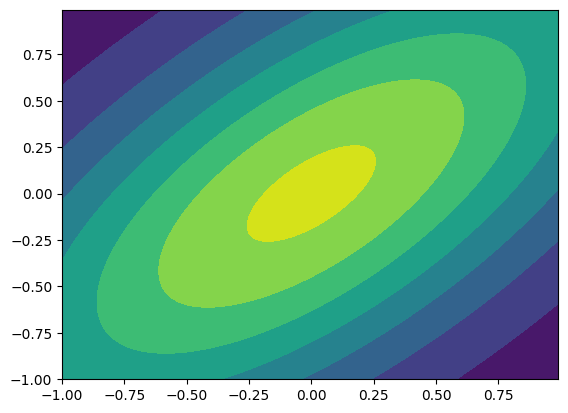

In [30]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html

x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(mean[1:], covariance_matrix[1:,1:])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))

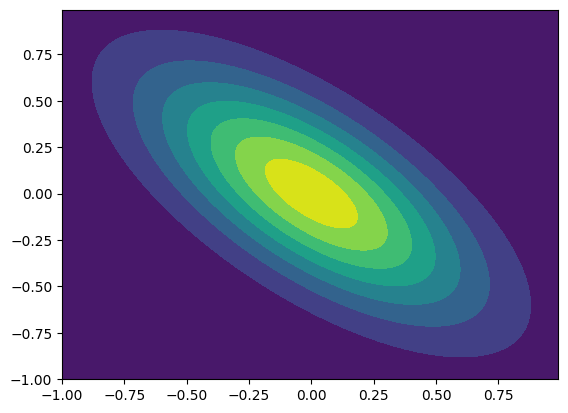

In [29]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(mean_cond, covariance_matrix_cond)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))

## Ex 4b

In [10]:
n_samples = 1000
y_0 = norm.rvs(loc=0, scale=1, size=n_samples)
tau = -0.5 + y_0
y_1 = y_0 + tau
z = np.where(tau >= 0, 1, 0)
y = z * y_1 + (1-z) * y_0

In [12]:
E_y_z_1 = np.mean(y[z==1])
E_y_z_0 = np.mean(y[z==0])

print(f'E[Y|Z=1] = {E_y_z_1}')
print(f'E[Y|Z=0] = {E_y_z_0}')
print(f'Delta = {E_y_z_1 - E_y_z_0}')

E[Y|Z=1] = 1.741219066106376
E[Y|Z=0] = -0.4984843621358427
Delta = 2.2397034282422186


In [13]:
fi_05 = norm.pdf(0.5, loc=0, scale=1)
Fi_05 = norm.cdf(0.5, loc=0, scale=1)
E_y_z_1_exact = -0.5 + 2 * fi_05 / (1 - Fi_05)
E_y_z_0_exact = fi_05 / Fi_05

print("Exact")
print(f'E[Y|Z=1] = {E_y_z_1_exact}')
print(f'E[Y|Z=0] = {E_y_z_0_exact}')
print(f'Delta = {E_y_z_1_exact - E_y_z_0_exact}')

Exact
E[Y|Z=1] = 1.7821555407361296
E[Y|Z=0] = 0.5091604338370336
Delta = 1.2729951068990961


## Ex05

In [27]:
n_samples = 1000

p_1 = 0.3
y_1 = bernoulli.rvs(p_1, size=n_samples)
p_0 = 0.01
y_0 = bernoulli.rvs(p_0, size=n_samples)

tau = sum(y_1 - y_0) / n_samples
print(f'tau = {tau}')

y_1_gt_y_0 = np.sum(y_1>y_0) / n_samples
print(f'%[Y(1)>Y(0)] = {y_1_gt_y_0}')


tau = 0.285
%[Y(1)>Y(0)] = 0.289


## Ex03

* https://users.nber.org/~rdehejia/nswdata2.html

NSW Data Files (Lalonde Sample)
These files contain the treated and control units from the male sub-sample from the National Supported Work Demonstration as used by Lalonde in his paper.

    nsw_treated.txt (297 observations)

    nsw_control.text (425 observations) 

These are text files. The order of the variables from left to right is: treatment indicator (1 if treated, 0 if not treated), age, education, Black (1 if black, 0 otherwise), Hispanic (1 if Hispanic, 0 otherwise), married (1 if married, 0 otherwise), nodegree (1 if no degree, 0 otherwise), RE75 (earnings in 1975), and RE78 (earnings in 1978). The last variable is the outcome; other variables are pre-treatment.

    nsw.dta NSW treated and control observations in Stata format


NSW Data Files (Dehejia-Wahha Sample)
Based on pre-intervention variables, we extract a further subset of Lalonde's NSW experimental data, a subset containing information on RE74 (earnings in 1974):

    nswre74_control.txt (260 observations)

    nswre74_treated.txt (185 observations)

The variables from left to right are: treatment indicator (1 if treated, 0 if not treated), age, education, Black (1 if black, 0 otherwise), Hispanic (1 if Hispanic, 0 otherwise), married (1 if married, 0 otherwise), nodegree (1 if no degree, 0 otherwise), RE74 (earnings in 1974), RE75 (earnings in 1975), and RE78 (earnings in 1978).

    nsw_dw.dta NSW treated and control observations (Dehejia-Wahba Sample) in Stata format 

* https://lendle.github.io/TargetedLearning.jl/user-guide/lalonde_example/
